## Turunan Parsial Symbolic

In [1]:
import sympy as sy

In [2]:
x,y,z = sy.symbols('x y z')
f = 4*x*y + x*sy.sin(z) + x**3 + y*z**8
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [3]:
# Turunan parsial terhadap x
sy.diff(f, x)

3*x**2 + 4*y + sin(z)

In [4]:
# Turunan parsial terhadap y
f.diff(y)

4*x + z**8

In [5]:
# Turunan parsial terhadap z
f.diff(z)

x*cos(z) + 8*y*z**7

### Gradient

In [6]:
from sympy.tensor.array import derive_by_array

grad = derive_by_array(f, (x,y,z))
grad

[3*x**2 + 4*y + sin(z), 4*x + z**8, x*cos(z) + 8*y*z**7]

### Jacobian

In [7]:
f_jacob = sy.Matrix([x**y+y, 2*x*y - 2])
f_jacob

Matrix([
[ x**y + y],
[2*x*y - 2]])

In [8]:
par = sy.Matrix([x,y])
f_jacob.jacobian(par)

Matrix([
[x**y*y/x, x**y*log(x) + 1],
[     2*y,             2*x]])

In [9]:
sy.Matrix(grad).jacobian(sy.Matrix([x,y,z]))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

### Hessian

In [10]:
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [11]:
sy.hessian(f,(x,y,z))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

## Turunan Parsial Numerik

In [3]:
import numpy as np

def f(x,y):
    return x**2*y + 2*x**3*y + y**4

x = np.linspace(1,10)
y = np.linspace(1,10)

z = np.array([[f(i,j) for i in x] for j in y])

dx,dy = np.gradient(z)

In [7]:
z

array([[4.00000000e+00, 5.71793215e+00, 7.98252429e+00, ...,
        1.88137733e+03, 1.98916795e+03, 2.10100000e+03],
       [5.51405365e+00, 7.54752436e+00, 1.02280620e+01, ...,
        2.22771579e+03, 2.35530469e+03, 2.48767732e+03],
       [7.59758576e+00, 9.94659503e+00, 1.30430782e+01, ...,
        2.57462373e+03, 2.72201090e+03, 2.87492412e+03],
       ...,
       [8.63851183e+03, 8.65506008e+03, 8.67687411e+03, ...,
        2.67226363e+04, 2.77609459e+04, 2.88381853e+04],
       [9.31474995e+03, 9.33161373e+03, 9.35384371e+03, ...,
        2.77436988e+04, 2.88018068e+04, 2.98995867e+04],
       [1.00300000e+04, 1.00471793e+04, 1.00698252e+04, ...,
        2.88037733e+04, 2.98816795e+04, 3.10000000e+04]])

In [4]:
z.shape

(50, 50)

In [5]:
dx

array([[   1.51405365,    1.82959221,    2.2455377 , ...,  346.33846043,
         366.13673811,  386.67731896],
       [   1.79879288,    2.11433144,    2.53027693, ...,  346.62319966,
         366.42147734,  386.96205819],
       [   2.46311416,    2.77865272,    3.19459822, ...,  347.28752094,
         367.08579863,  387.62637947],
       ...,
       [ 657.45523618,  657.77077474,  658.18672024, ..., 1002.27964296,
        1022.07792064, 1042.61850149],
       [ 695.74408466,  696.05962322,  696.47556871, ..., 1040.56849144,
        1060.36676912, 1080.90734997],
       [ 715.25004974,  715.5655883 ,  715.98153379, ..., 1060.07445652,
        1079.8727342 , 1100.41331505]])

In [6]:
dy

array([[   1.71793215,    1.99126214,    2.57510051, ...,  105.80708718,
         109.81133711,  111.83205127],
       [   2.03347071,    2.35700417,    3.04807816, ...,  125.24104197,
         129.98076638,  132.37263212],
       [   2.34900927,    2.7227462 ,    3.5210558 , ...,  144.67499676,
         150.15019564,  152.91321296],
       ...,
       [  16.54824442,   19.18113739,   24.80504982, ..., 1019.20296225,
        1057.7745126 , 1077.23935102],
       [  16.86378298,   19.54687942,   25.27802746, ..., 1038.63691704,
        1077.94394186, 1097.77993187],
       [  17.17932154,   19.91262144,   25.75100511, ..., 1058.07087183,
        1098.11337113, 1118.32051271]])

Text(0.5, 1.0, 'dy')

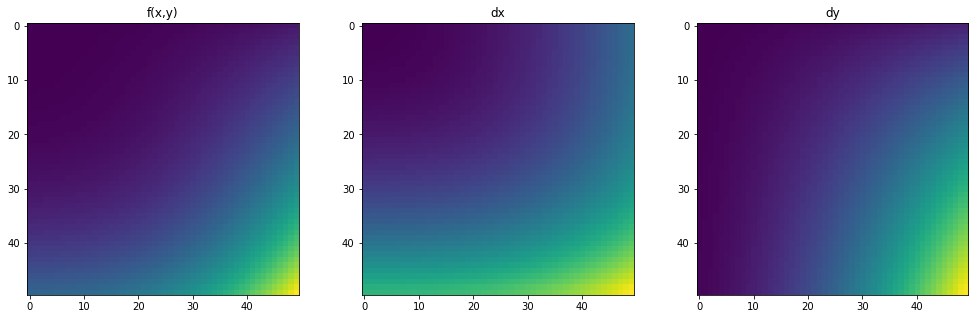

In [10]:
# plot z,dx,dy yang dianggap sebagai sebuah gambar
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(17,5))
ax[0].imshow(z)
ax[0].set_title('f(x,y)')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')